Finding correlation over the past year for avg # of emojis per LinkedIn post of HuggingFace employees (only public posts) vs Nvidia stock price


In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np



In [6]:
# Upload the CSV file to Colab
from google.colab import files
uploaded = files.upload()

# Load the data collected through each week's observations against the closing price at EOW for Nvidia
data = pd.read_csv('NVDAx.csv')
data.head()

Saving Untitled spreadsheet - NVDA (1).csv to Untitled spreadsheet - NVDA (1).csv


,Date,Nvidia Stock Price,Avg Emojis Per Post
0,2023-08-28,49.0,11.8
1,2023-09-04,46.0,9.9
2,2023-09-11,44.0,9.3
3,2023-09-18,42.0,8.3
4,2023-09-25,43.0,8.8


In [9]:
# Fix date column
data['Date'] = pd.to_datetime(data['Date'])

# Convert 'Nvidia Stock Price' and 'Avg Emojis Per Post' to numeric, coercing errors to NaN
data['Nvidia Stock Price'] = pd.to_numeric(data['Nvidia Stock Price'], errors='coerce')
data['Avg Emojis Per Post'] = pd.to_numeric(data['Avg Emojis Per Post'], errors='coerce')


# Remove rows with null values
data = data.dropna()

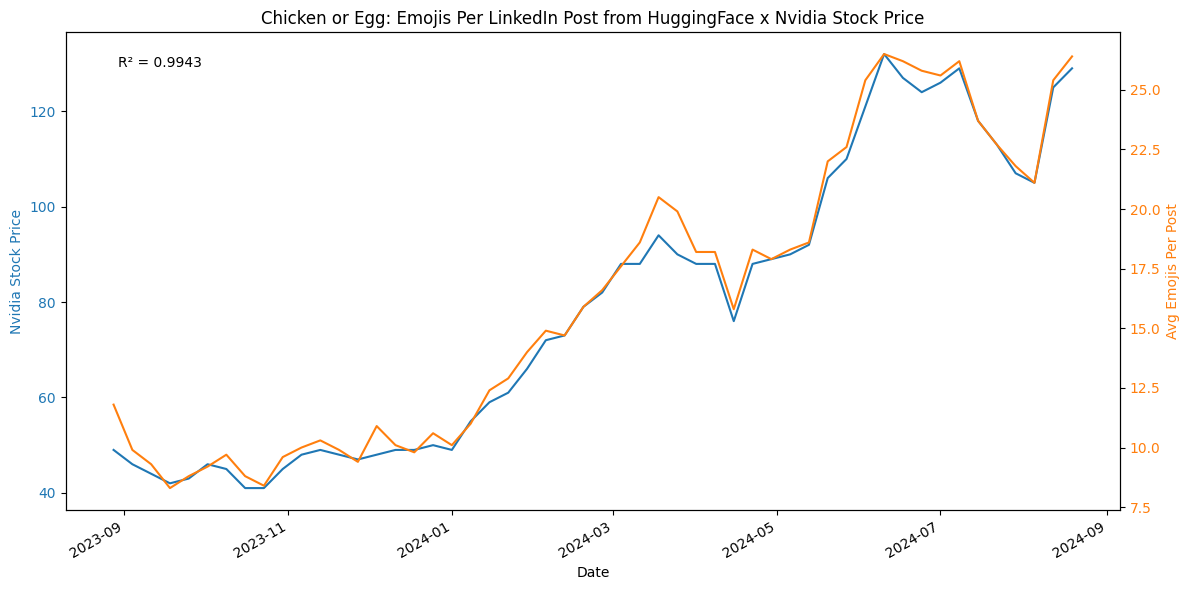

R²: 0.9943


In [10]:
# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Nvidia Stock Price on the left y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Nvidia Stock Price', color='tab:blue')
ax1.plot(data['Date'], data['Nvidia Stock Price'], color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for Avg Emojis Per Post
ax2 = ax1.twinx()
ax2.set_ylabel('Avg Emojis Per Post', color='tab:orange')
ax2.plot(data['Date'], data['Avg Emojis Per Post'], color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Set title
plt.title('Chicken or Egg: Emojis Per LinkedIn Post from HuggingFace x Nvidia Stock Price')

# Rotate and align the tick labels so they look better
fig.autofmt_xdate()

# Calculate the correlation coefficient (R²)
correlation_coefficient = np.corrcoef(data['Nvidia Stock Price'], data['Avg Emojis Per Post'])[0, 1]
r_squared = correlation_coefficient ** 2

# Add R² value to the plot
plt.text(0.05, 0.95, f'R² = {r_squared:.4f}', transform=ax1.transAxes, fontsize=10, verticalalignment='top')

# Show the plot
plt.tight_layout()
plt.show()

# Print the correlation coefficient
print(f"R²: {r_squared:.4f}")